## **1. IMPORT LIBRARY**

In [1]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
import os

## **2. UPLOAD DATASET**

In [2]:
df = pd.read_csv('wisbud_yogya.csv')
df = pd.read_csv('user_wisbud.csv')
df = pd.read_csv('rating_wisbud.csv')

## **3. DATA UNDERSTANDING**

3.1 Menyiapkan Data

In [3]:
# Menyimpan masing-masing dataset kedalam variabel
rating = pd.read_csv('rating_wisbud.csv')
wisata = pd.read_csv('wisbud_yogya.csv')
user = pd.read_csv('user_wisbud.csv')

3.2 Eksplorasi Fitur-fitur pada Data

3.2.1. Data wisata

In [43]:
wisata.head()

,no,nama_wisata,alamat,rating,harga_domestik,harga_mancanegara,link_gmaps,wilayah
0,1,Keraton Yogyakarta,"Jl. Rotowijayan Blok No. 1, Panembahan, Kecama...",4.6,15000,25000,https://goo.gl/maps/mGh6qz6GB3zAzKPZ7,Kota Yogyakarta
1,2,Museum Benteng Vredeburg Yogyakarta,"Jl. Margo Mulyo No.6, Ngupasan, Kec. Gondomana...",4.6,3000,10000,https://goo.gl/maps/UJ94oRi1pbTDrLH37,Kota Yogyakarta
2,3,De Mata Museum Jogja,"XT Square, Jl. Veteran No.150-151, Pandeyan, K...",4.4,50000,50000,https://goo.gl/maps/ADnuFzMNzdmWcfhPA,Kota Yogyakarta
3,4,Monumen Yogya Kembali,"Jl. Ring Road Utara, Jongkang, Sariharjo, Kec....",4.5,15000,15000,https://goo.gl/maps/eHZrSEPXiNsDHJKX9,Kabupaten Sleman
4,5,Kampung Wisata Kadipaten,"Kadipaten, Kecamatan Kraton, Kota Yogyakarta, ...",4.4,175000,175000,https://goo.gl/maps/wYCQxtY34Gk3nmDH7,Kota Yogyakarta


In [5]:
wisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   no                 39 non-null     int64  
 1   nama_wisata        39 non-null     object 
 2   alamat             39 non-null     object 
 3   rating             39 non-null     float64
 4   harga_domestik     39 non-null     int64  
 5   harga_mancanegara  39 non-null     int64  
 6   link_gmaps         39 non-null     object 
 7   wilayah            39 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.6+ KB


3.2.2. Data rating

In [6]:
# melihat gambaran data rating
rating.head()

,id_user,no,rating
0,1,3,3
1,1,7,4
2,1,20,3
3,1,38,3
4,2,10,2


In [7]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id_user  861 non-null    int64
 1   no       861 non-null    int64
 2   rating   861 non-null    int64
dtypes: int64(3)
memory usage: 20.3 KB


In [8]:
# Melihat ukuran dataset rating untuk Kota Yogyakarta
rating.shape

(861, 3)

3.2.3. Data user

In [9]:
# Melihat gambaran data user
user.head()

,id_user,lokasi,umur
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [10]:
# Melihat dataset user yang pernah memberi rating pada wisata di Kota Yogyakarta
user.shape

(279, 3)

## **4. DATA EXPLORATION**

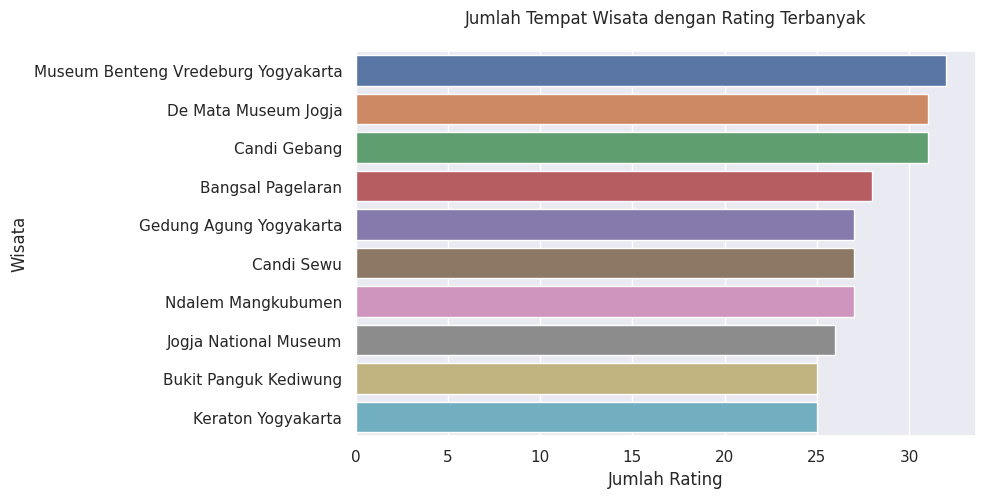

In [11]:
# Membuat dataframe berisi lokasi dengan jumlah rating terbanyak
top_10 = rating['no'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, wisata[['no','nama_wisata']], how='left', left_on='index', right_on='no')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot(x='no_x', y='nama_wisata', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Wisata')
plt.xlabel('Jumlah Rating')
plt.show()

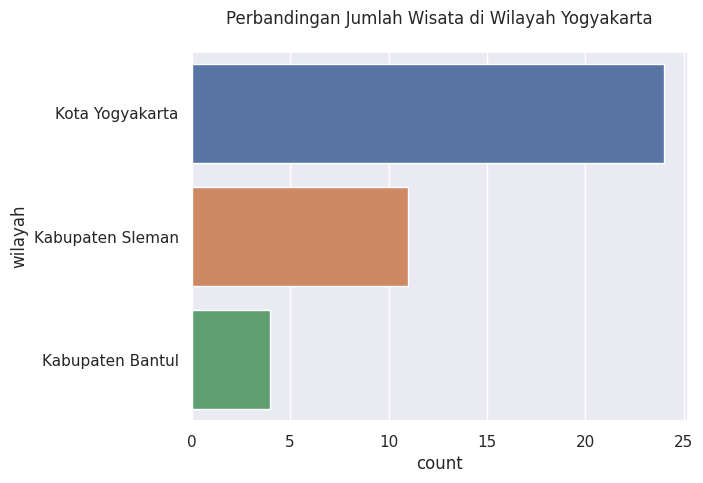

In [12]:
# Membuat visualisasi jumlah wisata di Wilayah Yogyakarta
sns.countplot(y='wilayah', data = wisata)
plt.title('Perbandingan Jumlah Wisata di Wilayah Yogyakarta', pad=20)
plt.show()

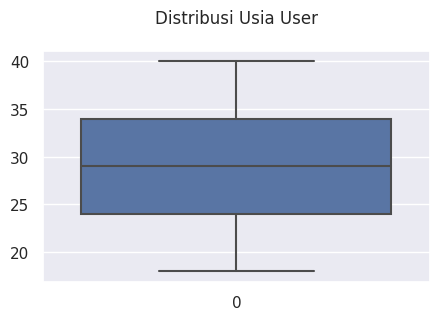

In [13]:
# Membuat visualisasi distribusi usia user
plt.figure(figsize=(5,3))
sns.boxplot(user['umur']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

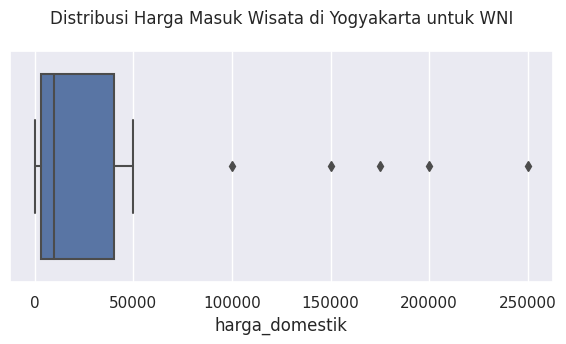

In [14]:
# Membuat visualisasi distribusi harga untuk WNI
plt.figure(figsize=(7,3))
sns.boxplot(x=wisata["harga_domestik"])
plt.title('Distribusi Harga Masuk Wisata di Yogyakarta untuk WNI', pad=20)
plt.show()

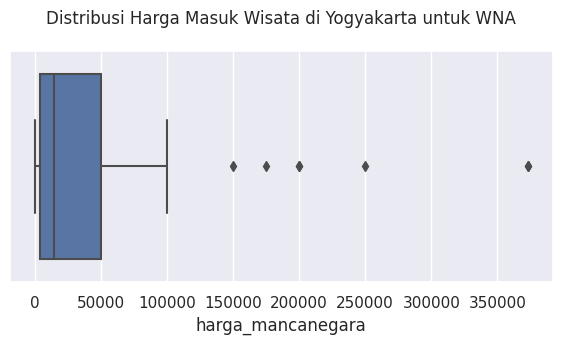

In [15]:
# Membuat visualisasi distribusi harga untuk WNA
plt.figure(figsize=(7,3))
sns.boxplot(x=wisata["harga_mancanegara"])
plt.title('Distribusi Harga Masuk Wisata di Yogyakarta untuk WNA', pad=20)
plt.show()

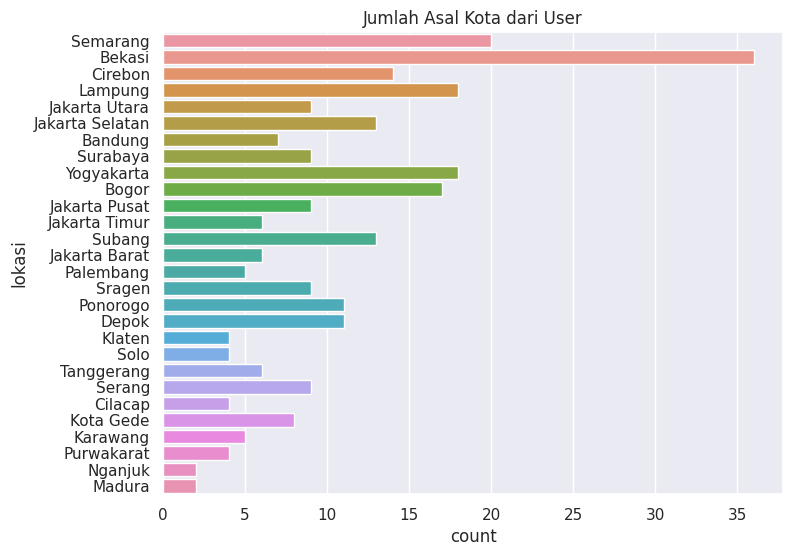

In [16]:
# Memfilter asal kota dari user
askot = user['lokasi'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

## **5. PERSIAPAN DATA UNTUK PEMODELAN**

5.1. Membuat Salinan Data rating

In [17]:
# Membaca dataset untuk dilakukan encoding
df = rating.copy()
df.head()

,id_user,no,rating
0,1,3,3
1,1,7,4
2,1,20,3
3,1,38,3
4,2,10,2


5.2. Melakukan Encoding

5.2.1. Membuat Fungsi untuk Melakukan Encoding

In [18]:
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

5.2.2. Encoding dan Mapping Kolom User

In [19]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('id_user')

# Mapping User_Id ke dataframe
df['user'] = df['id_user'].map(user_to_user_encoded)

5.2.3. Encoding dan Mapping Kolom Place

In [20]:
# Encoding Place_Id
wisata_to_wisata_encoded, wisata_encoded_to_wisata = dict_encoder('no')

# Mapping Place_Id ke dataframe place
df['wisata'] = df['no'].map(wisata_to_wisata_encoded)

5.3. Melihat Gambaran Data untuk Pemodelan

In [21]:
# Mendapatkan jumlah user dan place
num_users, num_wisata = len(user_to_user_encoded), len(wisata_to_wisata_encoded)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['rating']), max(df['rating'])

print(f'Number of User: {num_users}, Number of Wisata: {num_wisata}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 279, Number of Wisata: 39, Min Rating: 1.0, Max Rating: 5.0


In [22]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head(2)

,id_user,no,rating,user,wisata
714,233,9,1.0,232,10
605,196,6,2.0,195,9


## **6. MODELLING**

6.1. Membagi data train dan test

In [23]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'wisata']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

6.2. Menyiapkan Model

6.2.1. Inisialisasi Fungsi

In [24]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_wisata = num_wisata
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.wisatas_embedding = layers.Embedding( # layer embeddings places
        num_wisata,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.wisatas_bias = layers.Embedding(num_wisata, 1) # layer embedding places bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    wisatas_vector = self.wisatas_embedding(inputs[:, 1]) # memanggil layer embedding 3
    wisatas_bias = self.wisatas_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_wisatas = tf.tensordot(user_vector, wisatas_vector, 2)

    x = dot_user_wisatas + user_bias + wisatas_bias

    return tf.nn.sigmoid(x) # activation sigmoid

6.2.2. Inisialisasi Model

In [25]:
model = RecommenderNet(num_users, num_wisata, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

6.2.2. Inisialisasi Callbacks

In [26]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Lapor! Metriks validasi sudah sesuai harapan')
      self.model.stop_training = True

6.2.3. Proses Training

In [27]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
22/22 [==============================] - 2s 15ms/step - loss: 0.7532 - root_mean_squared_error: 0.3824 - val_loss: 0.8856 - val_root_mean_squared_error: 0.4233
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8035 - root_mean_squared_error: 0.4099 - val_loss: 0.8789 - val_root_mean_squared_error: 0.4224
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7459 - root_mean_squared_error: 0.3819 - val_loss: 0.8742 - val_root_mean_squared_error: 0.4217
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7356 - root_mean_squared_error: 0.3751 - val_loss: 0.8730 - val_root_mean_squared_error: 0.4214
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7740 - root_mean_squared_error: 0.3946 - val_loss: 0.8704 - val_root_mean_squared_error: 0.4211
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7401 - root_mean_squared_error: 0.3774 - val_loss: 0.8688 - val_root_

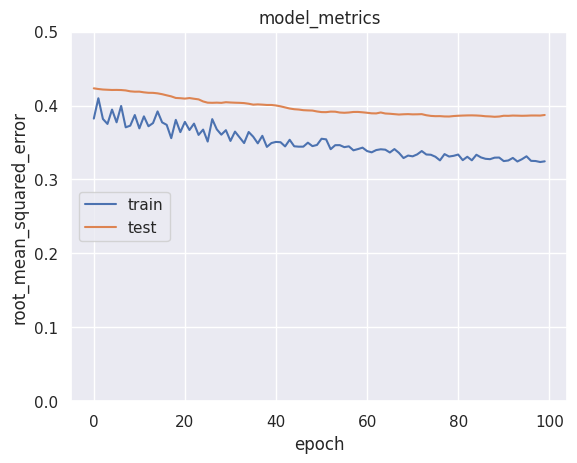

In [34]:
# Menampilkan plot loss dan validation

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.5)
plt.legend(['train', 'test'], loc='center left')
plt.show()

## **7. MEMPREDIKSI TOP 5**


7.1 Menyiapkan DataFrame untuk Menampilkan Hasil Rekomendasi

In [35]:
# Menyiapkan dataframe
wisata_df = wisata[['no','nama_wisata','wilayah','rating','harga_domestik','harga_mancanegara']]
wisata_df.columns = ['no','nama_wisata','wilayah','rating','harga_domestik','harga_mancanegara']
df = rating.copy()

7.2. Menyiapkan contoh User untuk Menampilkan Rekomendasi

7.2.1 Mencari User

In [36]:
# Mengambil sample user
id_user = df.id_user.sample(1).iloc[0]
wisata_visited_by_user = df[df.id_user == id_user]

7.2.2. Mencari Lokasi yang belum Dikunjungi User

In [37]:
# Membuat data lokasi yang belum dikunjungi user
wisata_not_visited = wisata_df[~wisata_df['no'].isin(wisata_visited_by_user.no.values)]['no']
place_not_visited = list(
    set(wisata_not_visited)
    .intersection(set(wisata_to_wisata_encoded.keys()))
)

wisata_not_visited = [[wisata_to_wisata_encoded.get(x)] for x in wisata_not_visited]
user_encoder = user_to_user_encoded.get(id_user)
user_wisata_array = np.hstack(
    ([[user_encoder]] * len(wisata_not_visited), wisata_not_visited)
)

7.3. Menampilkan Hasil Rekomendasi untuk User

In [40]:
# Mengambil top 5 recommendation
ratings = model.predict(user_wisata_array).flatten()
top_ratings_indices = ratings.argsort()[-7:][::-1]
recommended_no = [
    wisata_encoded_to_wisata.get(wisata_not_visited[x][0]) for x in top_ratings_indices
]

print('Daftar rekomendasi untuk: {}'.format('User ' + str(id_user)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)

top_wisata_user = (
    wisata_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .no.values
)

wisata_df_rows = wisata_df[wisata_df['no'].isin(top_wisata_user)]
for row in wisata_df_rows.itertuples():
    print(row.nama_wisata, ':', row.wilayah)

print('')
print('----' * 15)
print('Top 5 place recommendation')
print('----' * 15)

recommended_wisata = wisata_df[wisata_df['no'].isin(recommended_no)]
for row, i in zip(recommended_wisata.itertuples(), range(1,6)):
    print(i,'.', row.nama_wisata, '\n    ', row.wilayah, '\n    ', 'Harga WNI:', row.harga_domestik, '\n    ', 'Harga WNA:', row.harga_mancanegara, '\n    ', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

2/2 [==============================] - 0s 10ms/step
Daftar rekomendasi untuk: User 191

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Museum Benteng Vredeburg Yogyakarta : Kota Yogyakarta
Monumen Batik Yogyakarta : Kota Yogyakarta
Lava Bantal : Kabupaten Sleman
Candi Gebang : Kabupaten Sleman
Museum Wayang Kekayon : Kabupaten Bantul

------------------------------------------------------------
Top 5 place recommendation
------------------------------------------------------------
1 . Keraton Yogyakarta 
     Kota Yogyakarta 
     Harga WNI: 15000 
     Harga WNA: 25000 
     Rating Wisata  4.6 

2 . Monumen Yogya Kembali 
     Kabupaten Sleman 
     Harga WNI: 15000 
     Harga WNA: 15000 
     Rating Wisata  4.5 

3 . Taman Budaya Yogyakarta 
     Kota Yogyakarta 
     Harga WNI: 0 
     Harga WNA: 0 
     Rating Wisata  4.6 

4 . Museum Kereta Keraton Yogyak